Problem Statement 1) Calories_consumed-> predict weight gained using calories consumed 2) Delivery_time -> Predict delivery time using sorting time 3) Emp_data -> Build a prediction model for Churn_out_rate 4) Salary_hike -> Build a prediction model for Salary_hike

Do the necessary transformations for input variables for getting better R^2 value for the model prepared.

In [1]:
import pandas as pd# deals with data frame  
import numpy as np# deals with numerical values
import matplotlib.pylab as plt #for different types of plots
import statsmodels.formula.api as smf# for generating model 

In [2]:
dtime = pd.read_csv('delivery_time.csv')

In [3]:
dtime.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


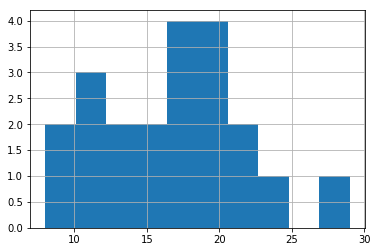

In [4]:
dtime['Delivery Time'].hist()

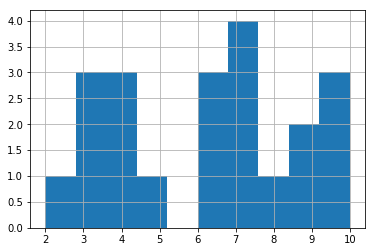

In [5]:
dtime['Sorting Time'].hist()

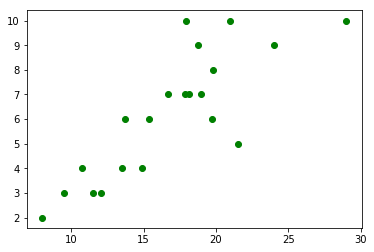

In [6]:
plt.scatter(dtime['Delivery Time'],dtime['Sorting Time'],color='Green')

There is exists correlation but we cant say how strong it is just by looking at the graph so lets find out the correlation coefficient

In [7]:
np.corrcoef(dtime['Delivery Time'],dtime['Sorting Time'])

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

There exists pretty good correlation between the 2

In [8]:
dtime.rename(columns={'Delivery Time':'dt','Sorting Time':'st'},inplace=True)

Lets build the model

In [9]:
model = smf.ols('dt~st',data=dtime).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           3.98e-06
Time:                        15:28:23   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see the R^2 Value isnt that good so have to perform transformations inorder to improve R^2 Value

In [11]:
model1 = smf.ols('np.log(dt)~st',data=dtime).fit()

In [12]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(dt)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           1.59e-06
Time:                        15:29:48   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
st             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see the R^2 Value has increased a bit we can performing transformations further

In [13]:
model2 = smf.ols('np.log(dt)~np.log(st)',data=dtime).fit()

In [14]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(dt)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           1.60e-07
Time:                        15:30:47   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(st)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

That is a very good R^2 value to proceeed with 

In [27]:
pred = model.predict(pd.DataFrame(dtime['st']))
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [28]:
model.conf_int(0.95)

,0,1
Intercept,6.473335,6.692133
st,1.632616,1.665424
